In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [36]:
df=pd.read_csv("creditcard.csv")

In [37]:
df.shape

(284807, 31)

In [38]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='Time'>

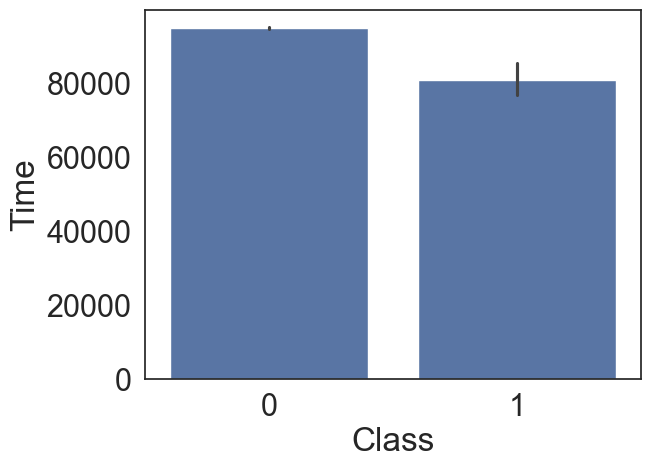

In [41]:
sns.barplot(x=df["Class"],y=df["Time"],data=df)


<Axes: xlabel='Class', ylabel='Amount'>

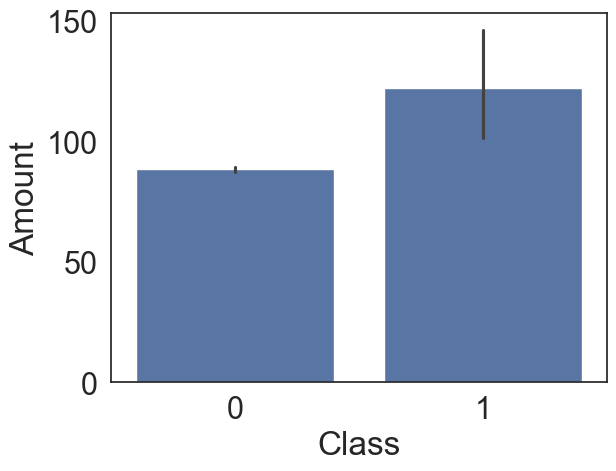

In [42]:
sns.barplot(x=df["Class"],y=df["Amount"],data=df)

<Axes: xlabel='Amount', ylabel='Time'>

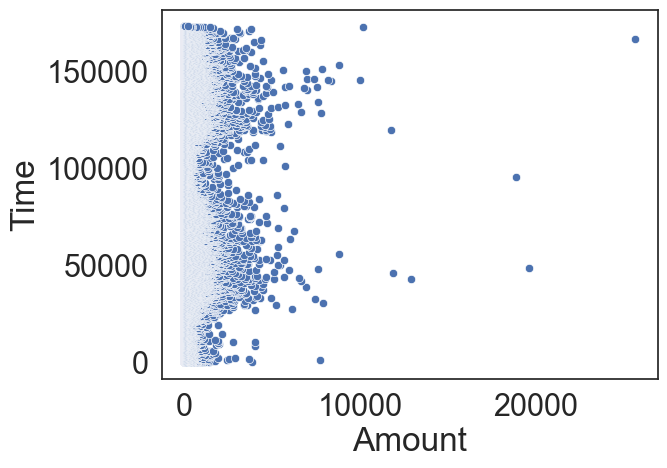

In [43]:
sns.scatterplot(x=df["Amount"],y=df["Time"],data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x236a3366480>,
 'caps': [<matplotlib.lines.Line2D at 0x236a42ea420>,
 'boxes': [<matplotlib.lines.Line2D at 0x236a42e9d00>],
 'medians': [<matplotlib.lines.Line2D at 0x236a42eaa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x236a42eac60>],
 'means': []}

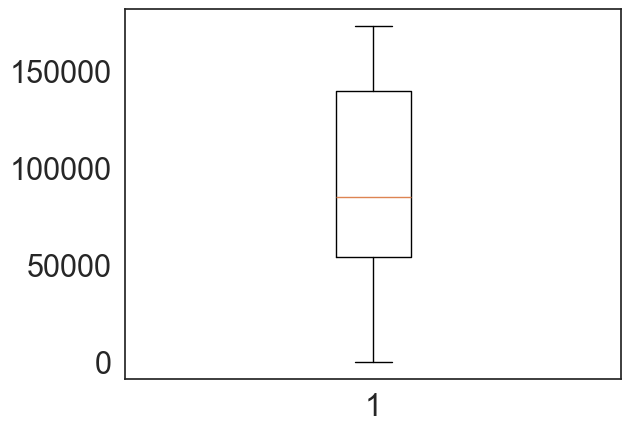

In [44]:
plt.boxplot(df["Time"])

(array([2.6279e+05, 1.3202e+04, 4.0430e+03, 1.9670e+03, 9.6600e+02,
        5.7300e+02, 3.6400e+02, 2.6300e+02, 1.2400e+02, 1.0300e+02,
        8.5000e+01, 5.9000e+01, 4.5000e+01, 4.7000e+01, 3.8000e+01,
        3.1000e+01, 2.2000e+01, 1.1000e+01, 1.4000e+01, 8.0000e+00,
        7.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

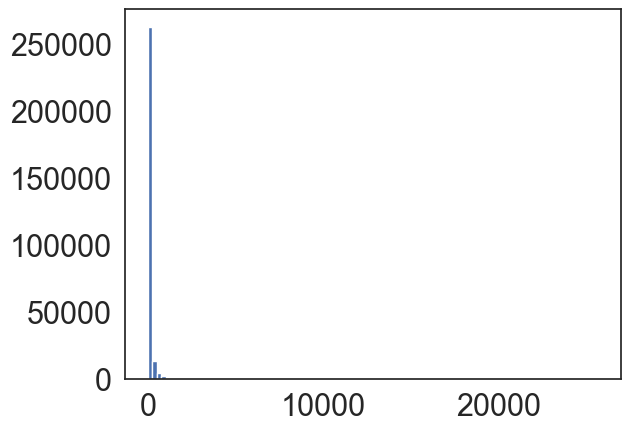

In [45]:
plt.hist(df["Amount"],bins=100)

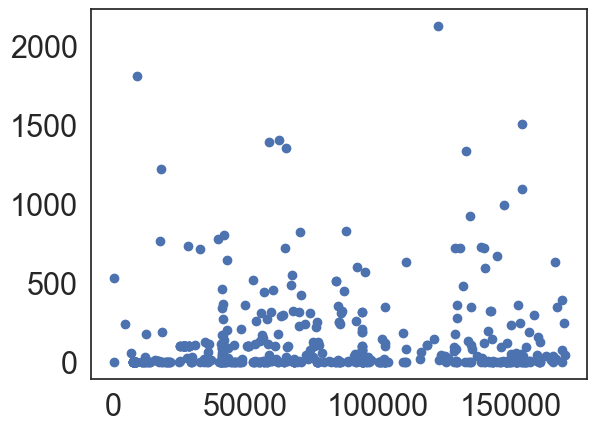

In [46]:
df_fraud=df[df["Class"]==1]
plt.scatter(df_fraud["Time"],df_fraud["Amount"])

In [47]:
df_fraud.shape

(492, 31)

In [48]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


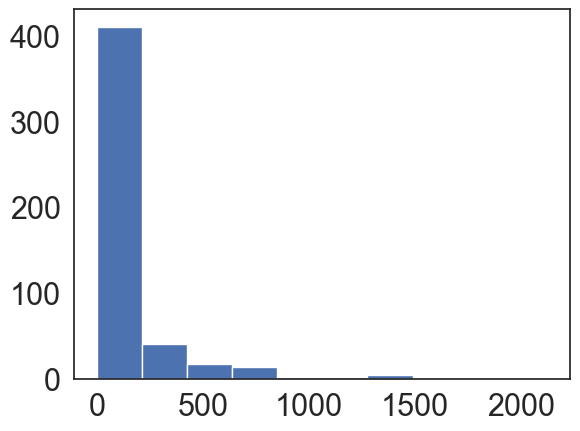

In [49]:
plt.hist(df_fraud["Amount"],bins=10)
plt.show()

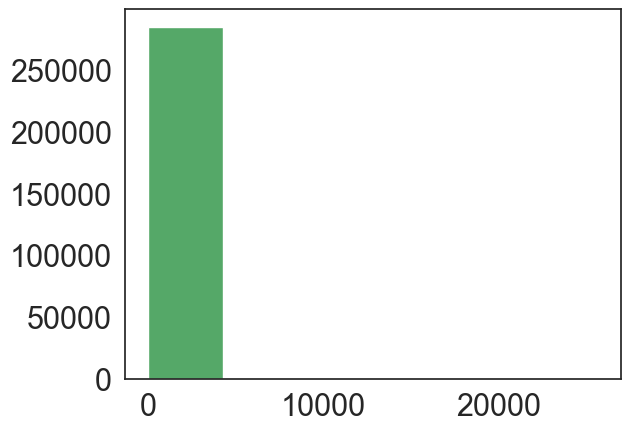

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [50]:
# we provide our solution here
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

In [51]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [52]:
str((284315-492)/284315)

'0.998269524998681'

In [53]:
corr=df.corr()

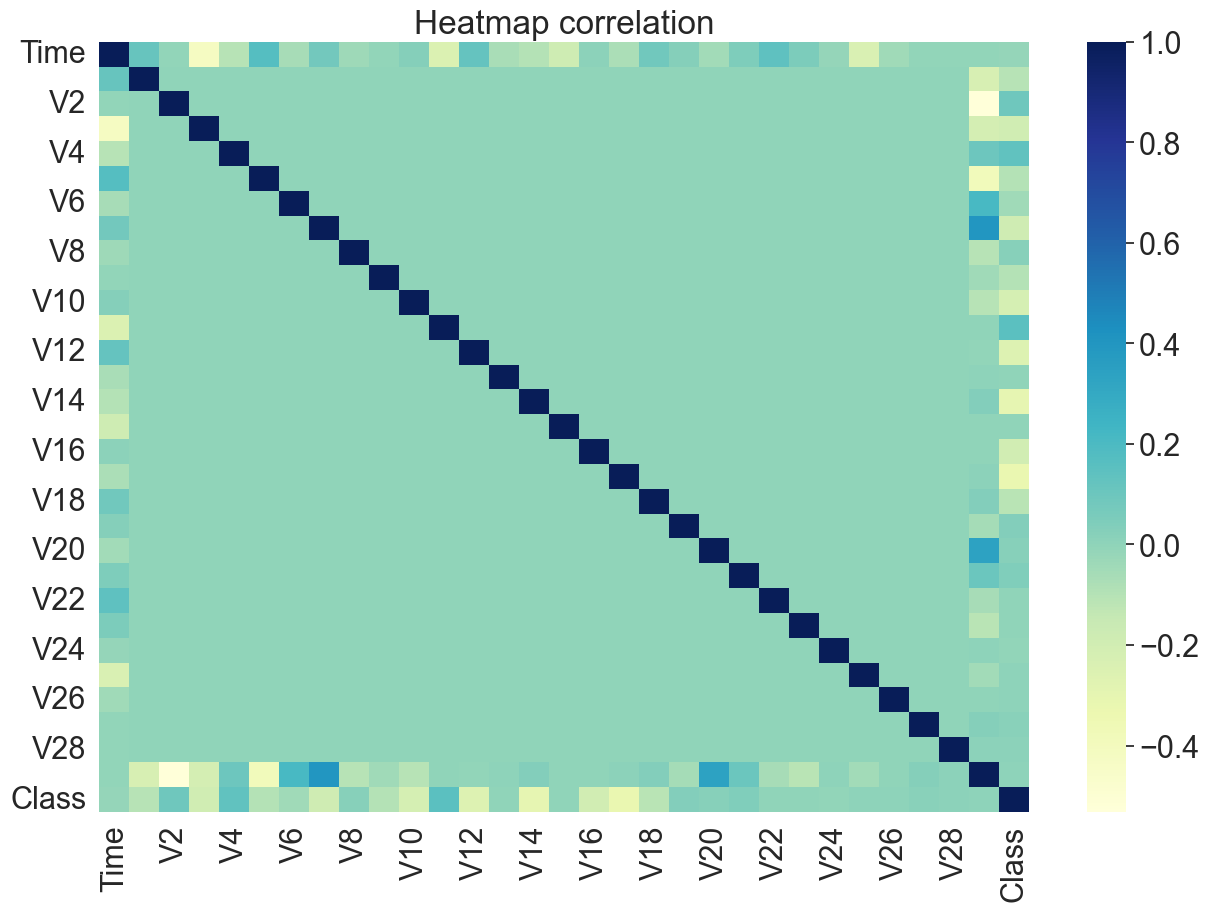

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [55]:
rank = corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [56]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [57]:
features=["Time","Amount"]

In [58]:
X=df[features]
y=df["Class"]

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=2)

#  First Way

### Reduce Dimensionality
- Purpose: Reduce the number of features to speed up training. 
- Method: Apply Principal Component Analysis (PCA) or Feature Selection to reduce the dimensionality.

In [61]:
n_samples, n_features = X_train.shape


#### reduce dimensionality of X_train dy reducing redundunts of data

In [30]:


from sklearn.decomposition import PCA


# Adjust n_components
pca = PCA(n_components=min(n_samples, n_features))
X_reduced = pca.fit_transform(X_train)


In [31]:
from sklearn.svm import SVC

svc=SVC(kernel="linear")
svc.fit(X_reduced,y_train)

SVC(kernel='linear')

In [32]:
predections=svc.predict(X_test)

In [33]:
accuracy_score(y_test,predections)

0.9985253326779256

In [62]:
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [63]:
n_chunks = 10  # Split data into 10 chunks
chunk_size = len(X) // n_chunks
chunks = [(X[i * chunk_size:(i + 1) * chunk_size], y[i * chunk_size:(i + 1) * chunk_size]) for i in range(n_chunks)]


In [64]:
models = []
for X_chunk, y_chunk in chunks:
    model = SVC(kernel='linear')  # or any kernel you prefer
    model.fit(X_chunk, y_chunk)
    models.append(model)


In [70]:
models

[SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear')]

In [72]:
from scipy.stats import mode
import numpy as np

# Ensure that 'predictions' contains valid predictions from each model
predictions = []

for model in models:
    pred = model.predict(X_test)
    predictions.append(pred)

# Convert predictions list to a numpy array for easy manipulation
predictions = np.array(predictions)

# Combine predictions using majority vote
if predictions.size > 0:
    final_predictions = mode(predictions, axis=0).mode[0]
else:
    raise ValueError("No predictions were generated. Check your models or input data.")


In [73]:
predections

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
final_predictions

0

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming `X_test` and `y_test` are already defined and valid
# Assuming you have a trained SVM model called `svc_model`

# Step 1: Generate predictions
final_predictions = svc.predict(X_test)

# Step 2: Check that final_predictions is a valid array
if isinstance(final_predictions, np.ndarray) and final_predictions.size > 0:
    # Step 3: Evaluate the model using various metrics
    
    # Accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision
    precision = precision_score(y_test, final_predictions, average='weighted')
    print(f"Precision: {precision:.4f}")

    # Recall
    recall = recall_score(y_test, final_predictions, average='weighted')
    print(f"Recall: {recall:.4f}")

    # F1 Score
    f1 = f1_score(y_test, final_predictions, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, final_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)
else:
    raise ValueError("The 'final_predictions' array is empty or malformed.")


Accuracy: 0.9985
Precision: 0.9971
Recall: 0.9985
F1 Score: 0.9978
Confusion Matrix:
[[56878     0]
 [   84     0]]


c:\Users\Capiter\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
